In [61]:
%matplotlib inline

import sklearn
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

sns.set_style('whitegrid')

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [6]:
X, y = load_boston(return_X_y=True)

In [12]:
Xtr, Xva, ytr, yva = train_test_split(X, y, shuffle=True)

In [63]:
T = 100       # boosting iterations
D = 2        # max depth
alpha = 0.1  # learning rate

def abs_pseudo_residual(yhat, y):
    pr = -((yhat - y) / np.abs(yhat - y))
    pr[np.isnan(pr)] = 0  # fill in nans
    return pr

training_errors = []
validation_errors = []

learners = []
learners.append(DecisionTreeRegressor(max_depth=D).fit(Xtr, ytr))

# boost...
for t in range(T - 1):
    # compute training and validation error
    t_prd = np.zeros_like(ytr)
    v_prd = np.zeros_like(yva)
    for rgr in learners:
        t_prd += rgr.predict(Xtr)
        v_prd += rgr.predict(Xva)
    t_err = (t_prd - ytr)
    v_err = (v_prd - yva)
    
    training_errors.append(np.abs(t_err).mean())
    validation_errors.append(np.abs(v_err).mean())
    print("training error: {}, validation error: {}".format(
        np.abs(t_err).mean(),
        np.abs(v_err).mean()
    ))
    
    #print("training error: {}".format(np.abs(t_err).mean()))
    
    pr = abs_pseudo_residual(t_prd, ytr)
    
    rgr = DecisionTreeRegressor(max_depth=D)
    rgr.fit(Xtr, pr)
    learners.append(rgr)

training error: 3.6169919985473085, validation error: 3.427774414300282
training error: 3.437473381069593, validation error: 3.283142998540601
training error: 3.2966024536971537, validation error: 3.1165568978890414
training error: 3.1745053542671613, validation error: 3.0358176913602417
training error: 3.0857294341961863, validation error: 2.986051743700792
training error: 2.999329472290439, validation error: 2.957290250447813
training error: 2.882186181820627, validation error: 2.8746081712305167
training error: 2.8063923402350803, validation error: 2.8251690876229225
training error: 2.736645773184829, validation error: 2.7620495526348456
training error: 2.6893168155776266, validation error: 2.74786626500932
training error: 2.638483401365664, validation error: 2.7074412772316476
training error: 2.5752811050050695, validation error: 2.7072364329187093
training error: 2.532863688672846, validation error: 2.6654546469255114
training error: 2.487691746758752, validation error: 2.59843326

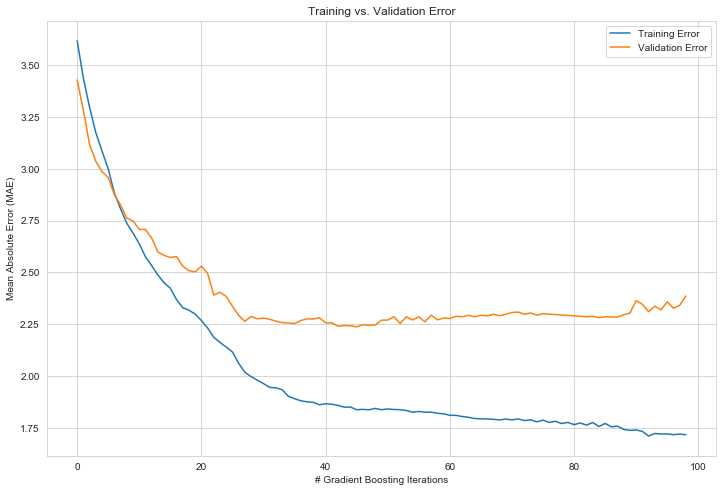

In [70]:
plt.figure(figsize=(12, 8))
plt.plot(range(T-1), training_errors)
plt.plot(range(T-1), validation_errors)
plt.legend(['Training Error', 'Validation Error'])
plt.title('Training vs. Validation Error')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('# Gradient Boosting Iterations')

plt.savefig('gradient_boosting_validation_error.png')